# Data Visualization Assignment - Wenli Xie

## Part 1: Matplotlib

### Create a line plot comparing total population over time:

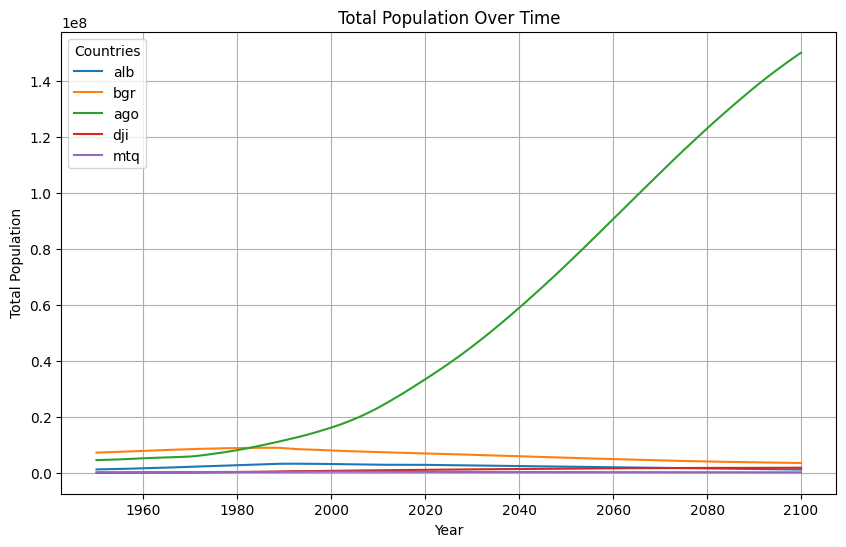

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set the directory where your data is stored
data_directory = '/Users/kankantingting/07-visualization-kanting6/ddf--datapoints--population--by--country--age--gender--year'

# Initialize a dictionary to hold the dataframes for each country
data = {}
for filename in os.listdir(data_directory):
    if filename.endswith('.csv'):
        country_name = filename.split('.')[0]  # Get the country name from filename
        data[country_name] = pd.read_csv(os.path.join(data_directory, filename))

# Combine all dataframes into one
combined_df = pd.concat(data.values(), ignore_index=True)
# Choose five countries to compare
countries_to_compare = ['alb', 'bgr', 'ago', 'dji', 'mtq'] 

# Filter for the selected countries and calculate total population by year
filtered_df = combined_df[combined_df['country'].isin(countries_to_compare)]
total_population_by_country_year = filtered_df.groupby(['year', 'country'])['population'].sum().unstack()

# Plotting
plt.figure(figsize=(10, 6))
for country in countries_to_compare:
    plt.plot(total_population_by_country_year.index, total_population_by_country_year[country], label=country)

plt.title('Total Population Over Time')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend(title='Countries', loc='upper left')
plt.grid()
plt.show()


### Investigating Demographic Shifts Using a Stacked Bar Chart

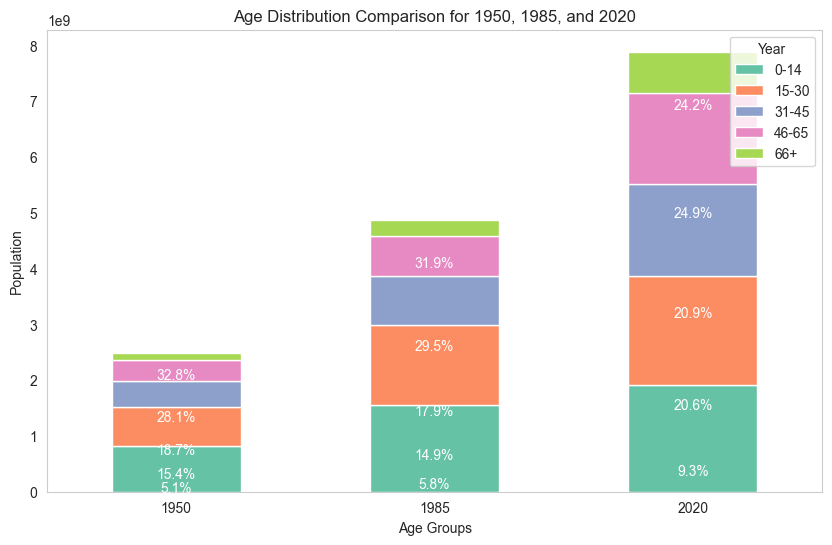

In [6]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

# Define age groups
age_bins = [0, 14, 30, 45, 65, 100]
age_labels = ['0-14', '15-30', '31-45', '46-65', '66+']

# Select years for comparison
years_to_compare = [1950, 1985, 2020]

# Initialize a dictionary to hold age distribution data for the selected years
age_distribution_data = {}

# Calculate age distributions for each year
for year in years_to_compare:
    age_data = combined_df[combined_df['year'] == year]
    age_data['age_group'] = pd.cut(age_data['age'], bins=age_bins, labels=age_labels, right=False)
    
    # Group by age and country and sum population
    age_distribution = age_data.groupby('age_group')['population'].sum()
    age_distribution_data[year] = age_distribution

# Convert the dictionary to a DataFrame
age_distribution_df = pd.DataFrame(age_distribution_data).T

# Plotting the stacked bar chart
age_distribution_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=plt.cm.Set2.colors)

plt.title('Age Distribution Comparison for 1950, 1985, and 2020')
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.xticks(rotation=0)
plt.legend(title='Year', loc='upper right')
plt.grid()

# Add percentage annotations
for i in range(age_distribution_df.shape[0]):
    total = age_distribution_df.iloc[i].sum()
    for j in range(age_distribution_df.shape[1]):
        percentage = (age_distribution_df.iloc[i, j] / total) * 100
        plt.text(i, total - age_distribution_df.iloc[i].cumsum()[j] + age_distribution_df.iloc[i, j] / 2,
                 f'{percentage:.1f}%', ha='center', va='center', color='white')

plt.show()


## Part 2: Seaborn

### Create a heatmap showing the population distribution across age groups for 5 countries in a specific year

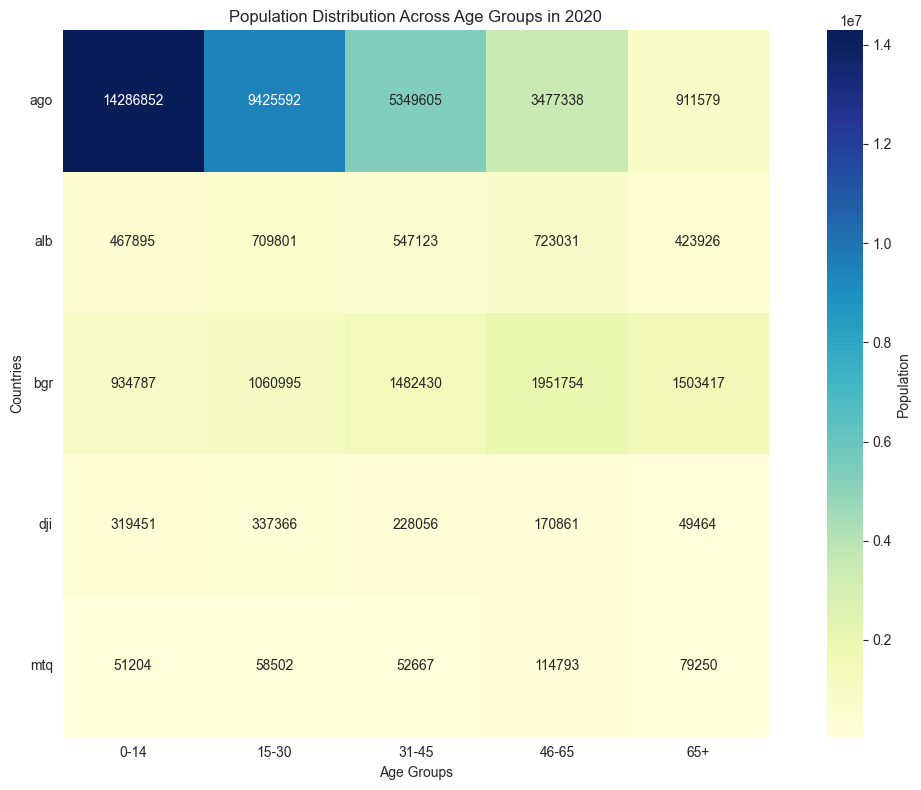

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# Set the directory where your data is stored
data_directory = '/Users/kankantingting/07-visualization-kanting6/ddf--datapoints--population--by--country--age--gender--year'

# Specific countries to analyze
countries = ['alb', 'bgr', 'ago', 'dji', 'mtq']
specific_year = 2020

# Initialize an empty list to store dataframes
dfs = []

# Load data for each country
for country in countries:
    for filename in os.listdir(data_directory):
        if filename.endswith('.csv'):
            df = pd.read_csv(os.path.join(data_directory, filename))
            if 'country' in df.columns and df['country'].iloc[0].lower() == country:
                dfs.append(df)
                break

# Combine all data
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
else:
    raise ValueError("No data found for specified countries")

# Define age groups
age_bins = [0, 14, 30, 45, 65, 100]
age_labels = ['0-14', '15-30', '31-45', '46-65', '65+']

# Filter for specific year and create age groups
year_data = combined_df[combined_df['year'] == specific_year].copy()
year_data['age_group'] = pd.cut(year_data['age'], 
                               bins=age_bins, 
                               labels=age_labels, 
                               right=False)

# Sum population by country and age group
heatmap_data = year_data.groupby(['country', 'age_group'])['population'].sum().unstack()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, 
            annot=True,
            fmt='.0f',
            cmap='YlGnBu',
            cbar_kws={'label': 'Population'},
            square=True)

plt.title(f'Population Distribution Across Age Groups in {specific_year}')
plt.xlabel('Age Groups')
plt.ylabel('Countries')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


### Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.

Columns in country_data: Index(['country', 'age', 'gender', 'year', 'population'], dtype='object')


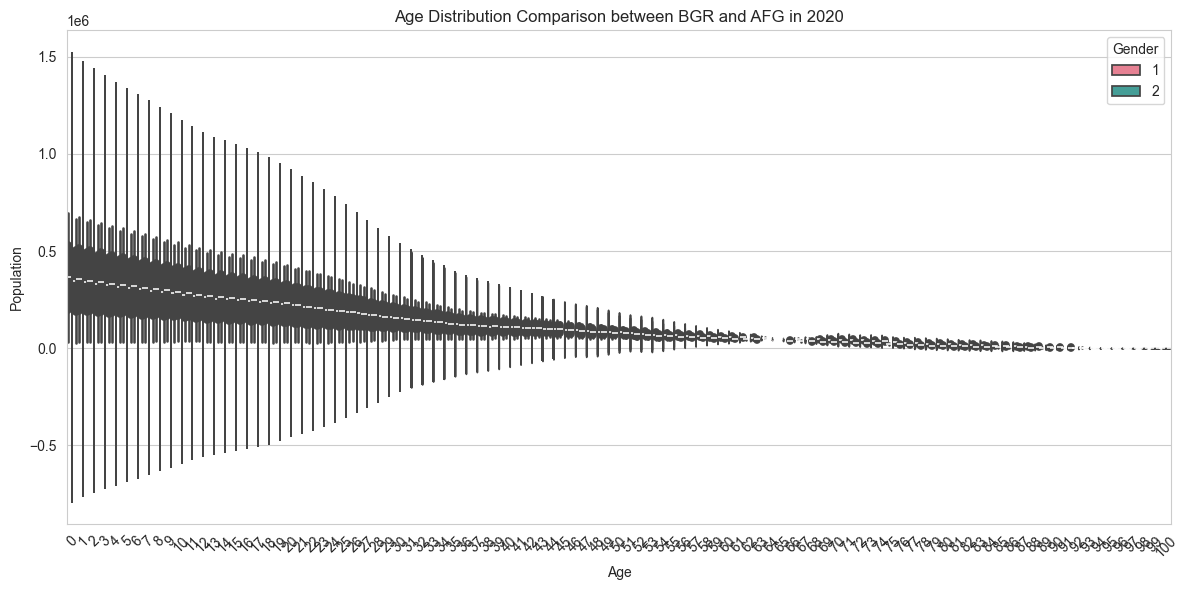

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Set the style and color palette
sns.set_style("whitegrid")
colors = sns.color_palette("husl", 2)

# Specify the countries to compare and the specific year
country1 = 'bgr'  
country2 = 'afg' 
specific_year = 2020  

# Filter the data for the two countries and the specific year
country_data = combined_df[(combined_df['country'].isin([country1, country2])) & (combined_df['year'] == specific_year)]

# Check if the 'age' and 'gender' columns exist
print("Columns in country_data:", country_data.columns)

if 'age' in country_data.columns and 'gender' in country_data.columns:
    # Create the violin plot
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=country_data, x='age', y='population', hue='gender', split=True, palette=colors)
    
    # Add labels and title
    plt.title(f'Age Distribution Comparison between {country1.upper()} and {country2.upper()} in {specific_year}')
    plt.xlabel('Age')
    plt.ylabel('Population')
    plt.xticks(rotation=45)
    
    plt.legend(title='Gender')
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("Error: Required columns not found in country_data.")


##### This population pyramid compares the age distribution between BGR (Bulgaria) and AFG (Afghanistan) in 2020, revealing stark demographic contrasts: AFG shows a classic "pyramid" shape with a very wide base, indicating a young population with high birth rates, whereas BGR displays an "inverted pyramid" or "urn" shape, characteristic of an aging population with low birth rates. Both populations show some gender imbalances across age groups. 

### Create a pairplot comparing population metrics across four countries:

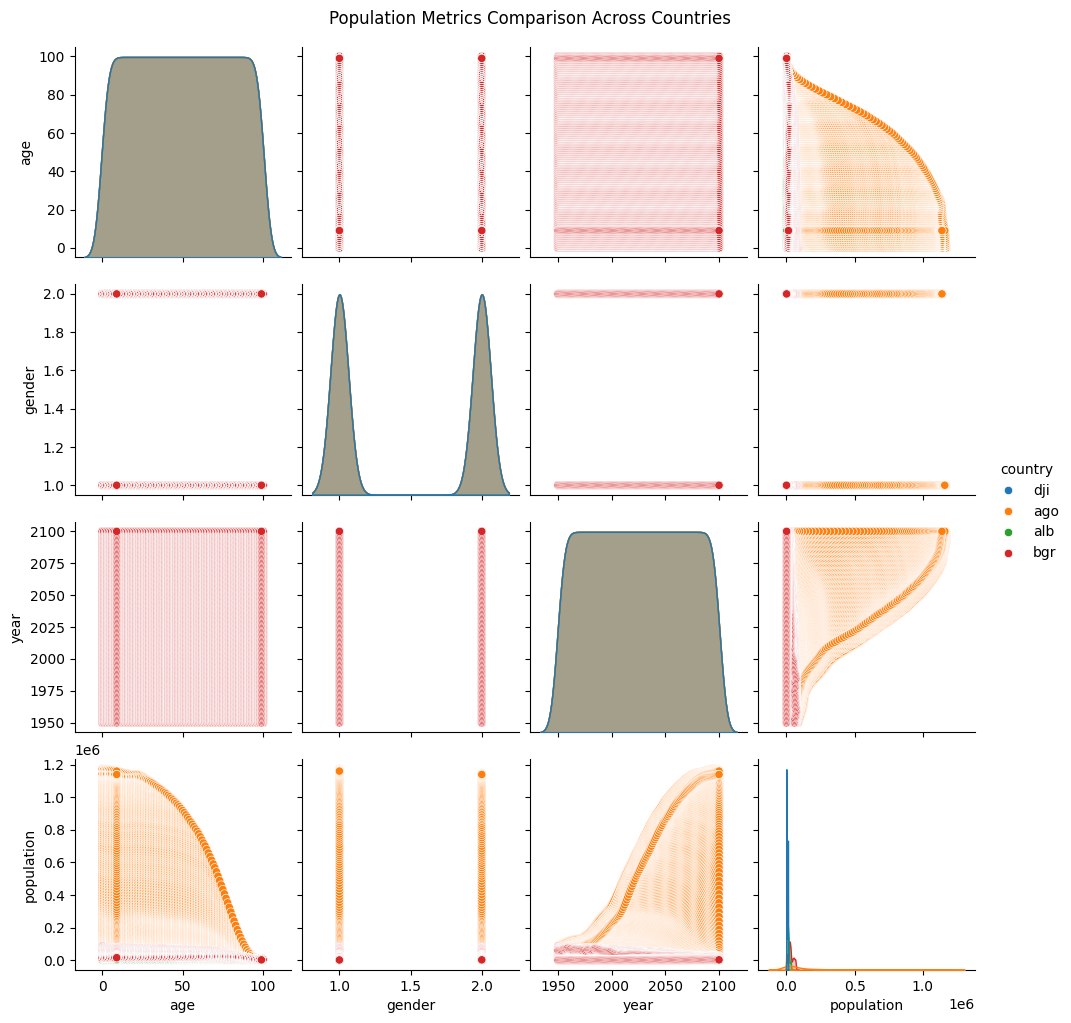

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set the directory where your data is stored
data_directory = '/Users/kankantingting/07-visualization-kanting6/ddf--datapoints--population--by--country--age--gender--year'

# Initialize a dictionary to hold the dataframes for each country
data = {}
for filename in os.listdir(data_directory):
    if filename.endswith('.csv'):
        country_name = filename.split('.')[0]  # Get the country name from filename
        data[country_name] = pd.read_csv(os.path.join(data_directory, filename))

# Combine all dataframes into one
combined_df = pd.concat(data.values(), ignore_index=True)

# Select four countries for comparison
countries_to_compare = ['alb', 'bgr', 'ago', 'dji'] 

# Filter the dataframe for the selected countries
filtered_df = combined_df[combined_df['country'].isin(countries_to_compare)]

# Plot a pairplot with seaborn
sns.pairplot(filtered_df, hue='country', diag_kind='kde')
plt.suptitle('Population Metrics Comparison Across Countries', y=1.02)
plt.show()


##### The age distributions show a roughly trapezoidal shape, indicating relatively even distribution across age groups with tapering at higher ages. The gender ratio data is binary (1 and 2, likely representing male and female). There appears to be a relatively balanced gender distribution with slight variation.

## Part 3: Open-ended, not required

### Create a visualization using either plotnine, streamlit, or plotly dash.

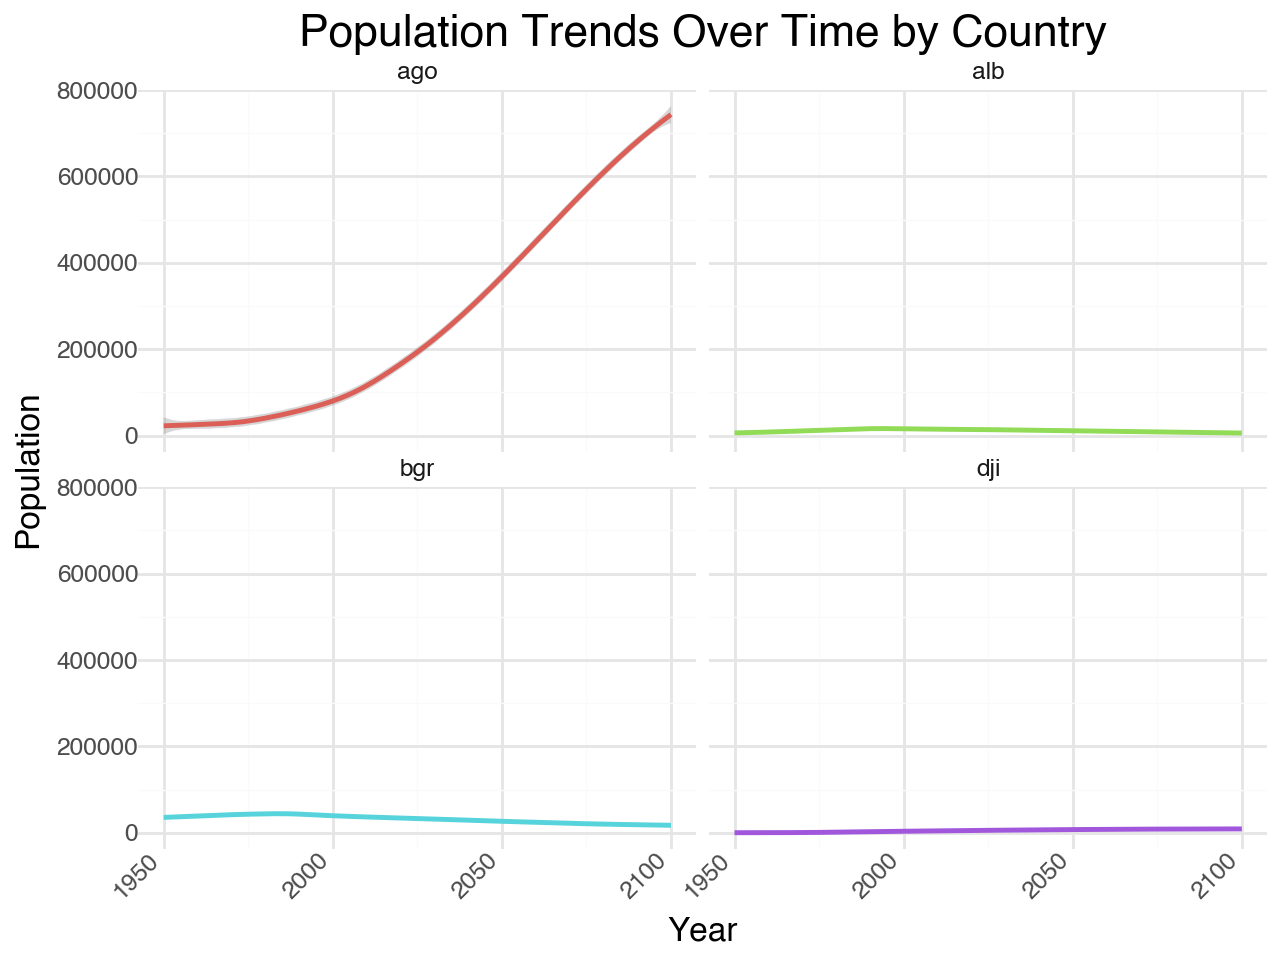

In [1]:
from plotnine import *
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

data_directory = '/Users/kankantingting/07-visualization-kanting6/ddf--datapoints--population--by--country--age--gender--year'

# Initialize a dictionary to hold the dataframes for each country
data = {}
for filename in os.listdir(data_directory):
    if filename.endswith('.csv'):
        country_name = filename.split('.')[0]
        data[country_name] = pd.read_csv(os.path.join(data_directory, filename))

# Combine all dataframes into one
combined_df = pd.concat(data.values(), ignore_index=True)

# Select a subset of countries for the comparison
countries_to_compare = ['alb', 'bgr', 'ago', 'dji']
filtered_df = combined_df[combined_df['country'].isin(countries_to_compare)]

# Plotting with plotnine
p = (ggplot(filtered_df, aes(x='year', y='population', color='country'))
     + geom_smooth(method='loess', span=0.2)  # Smooth trend lines
     + facet_wrap('~country')  # Facet by country for comparison
     + labs(title="Population Trends Over Time by Country",
            x="Year",
            y="Population")
     + theme_minimal()
     + theme(subplots_adjust={'wspace': 0.25},  # Adjust spacing between facets
             axis_text_x=element_text(rotation=45, ha='right'),
             legend_position="none",  # Hide legend since color distinguishes countries in facets
             plot_title=element_text(size=16, weight='bold'),
             axis_title=element_text(size=12))
)

print(p)
